# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

>**Tip**: Though it's not a mandate, students can attempt the classroom quizzes to ensure statistical numeric values are calculated correctly in many cases.

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [269]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


>**Tip**: Please save your work regularly.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [270]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [271]:
rows = df.shape[0] #number of rows equal 294477 row
print("the number of rows = {}".format(rows))

# also we can use df.info()

the number of rows = 294478


**c.** The number of unique users in the dataset.

In [272]:
df['user_id'].nunique() # number of unique users = 290584 

290584

**d.** The proportion of users converted.

In [273]:
users_porpotion = df.query('converted == 1').user_id.nunique()/df.user_id.nunique() 
print("the users_porpotion = {}".format(users_porpotion))

the users_porpotion = 0.12104245244060237


**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [274]:
unmatched_results = df.query('(group == "treatment" and landing_page != "new_page")').timestamp.count()
print("the number of times group is treatment but landing_page is not a new_page are {}".format(unmatched_results))

the number of times group is treatment but landing_page is not a new_page are 1965


**f.** Do any of the rows have missing values?

In [275]:
miss_values = df.isnull().sum(axis=1).sum()
print("the number of rows that have a missing values are {} ".format(miss_values))
# the result claims no missing values in rows 

the number of rows that have a missing values are 0 


### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [276]:
# rows where they match
df2 = df.query('(group == "treatment" and landing_page == "new_page") or (group == "control" and landing_page == "old_page")')

In [277]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [278]:
print("the number of unique users ids = {}".format(df2.user_id.nunique()))

the number of unique users ids = 290584


**b.** There is one **user_id** repeated in **df2**.  What is it?

In [279]:

repeated_userid =df2[df2['user_id'].duplicated()==True] 
print(repeated_userid, '\n\nand his/her id number is {}.'.format(df2[df2.user_id.duplicated()].user_id.iloc[0]))


      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0 

and his/her id number is 773192.


**c.** Display the rows for the duplicate **user_id**? 

In [280]:
# the duplicated rows of user 773192
df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [281]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 

# i tried  df2.drop_duplicates() and didnt work so i used another way by choosing the exact row i want to delete
df2.drop([2893],axis=0,inplace =True,errors="ignore") 
# Check again if the row with a duplicate user_id is deleted or not
df2.query('user_id == "773192"')

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

>**Tip**: The probability  you'll compute represents the overall "converted" success rate in the population and you may call it $p_{population}$.



In [282]:
individual_conv_prob = df2.query('converted == 1').user_id.nunique()/df2.user_id.nunique()
print("the probability of individual converting = {} ".format(individual_conv_prob))
# another way and as we see there are slight differences
print("\n",df['converted'].mean())

print("\nand it equals in percentage = {} %".format(individual_conv_prob*100))

the probability of individual converting = 0.11959708724499628 

 0.119659193556

and it equals in percentage = 11.959708724499627 %


**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [283]:
control_conv_prob = df2.query('converted == 1 and group =="control"').user_id.nunique()/df2.query('group == "control"').user_id.nunique()

print(control_conv_prob)

print("\nand it equals in percentage = {} %".format(control_conv_prob*100))

0.1203863045004612

and it equals in percentage = 12.03863045004612 %


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [284]:
treatment_cov_prob = df2.query('converted == 1 and group =="treatment"').user_id.nunique()/df2.query('group == "treatment"').user_id.nunique()

print(treatment_cov_prob)

print("\nand it equals in percentage = {} %".format(treatment_cov_prob*100))

0.11880806551510564

and it equals in percentage = 11.880806551510565 %


>**Tip**: The probabilities you've computed in the points (b). and (c). above can also be treated as conversion rate. 
Calculate the actual difference  (`obs_diff`) between the conversion rates for the two groups. You will need that later.  

In [285]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = control_conv_prob - treatment_cov_prob

print(obs_diff)

print("\nand it equals in percentage = {} %".format(obs_diff*100))

0.0015782389853555567

and it equals in percentage = 0.15782389853555567 %


**d.** What is the probability that an individual received the new page?

In [286]:
prob_newpg_recived =  df2.query('landing_page =="new_page"').user_id.nunique()/df2.user_id.nunique()

print(prob_newpg_recived)

print("\nand it equals in percentage = {} %".format(prob_newpg_recived*100))

0.5000619442226688

and it equals in percentage = 50.00619442226688 %


**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

The summary so far :

1- as we saw from both conversion rates for control and treatment gruops it seems That the conversion rate of 
control group is sligthly hihger Than that of Treatment group with about   0.0015782389853555567 or 0.15782389853555567 %
as we can see from 'obs_diff' result .

 2- despite The fact That the probability of new page recived is about 0.5000619442226688 or 50.00619442226688 %            which is about  half and its conisder a high  probability ,but we still can not  reach a conclusive argue yet . 

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

1 - first for 𝐻0 hypothesis IS :

$$  𝐻0 =  𝑝𝑛𝑒𝑤 -   𝑝𝑜𝑙𝑑 < =  0  $$

2- 2nd for 𝐻1 hypothesis IS :

 $$  𝐻1 =  𝑝𝑛𝑒𝑤 -   𝑝𝑜𝑙𝑑  >  0 $$ 

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [287]:
## the conversion rate for 𝑝𝑛𝑒𝑤 under the null hypothesis


𝑝𝑛𝑒𝑤 = df2.query('converted == 1').user_id.nunique()/df2.user_id.nunique()

print("the conversion rate for 𝑝𝑛𝑒𝑤 under null hypothes is {}".format(𝑝𝑛𝑒𝑤))
print("and it's percentage =  {} %".format(𝑝𝑛𝑒𝑤 *100))

the conversion rate for 𝑝𝑛𝑒𝑤 under null hypothes is 0.11959708724499628
and it's percentage =  11.959708724499627 %


**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [288]:
𝑝_𝑜𝑙𝑑 = df2.query('converted == 1').user_id.nunique()/df2.user_id.nunique()

print("the conversion rate for 𝑝_𝑜𝑙𝑑 under null hypothes is {}".format(𝑝_𝑜𝑙𝑑))
print("and it's percentage =  {} %".format(𝑝_𝑜𝑙𝑑*100))

the conversion rate for 𝑝_𝑜𝑙𝑑 under null hypothes is 0.11959708724499628
and it's percentage =  11.959708724499627 %


**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [289]:
# first creating a  data frame  for treatment group 
treatment_df = df2.query('group =="treatment"')
# the number of individuals in the treatment group
𝑛𝑛𝑒𝑤  = treatment_df.user_id.nunique()
print("the number of individuals in the treatment group = {}".format(𝑛𝑛𝑒𝑤))

the number of individuals in the treatment group = 145310


**d.** What is $n_{old}$, the number of individuals in the control group?

In [290]:
# creating a data frame for control group
control_df =df2.query('group =="control"')
# the number of individuals in the control group
𝑛𝑜𝑙𝑑  = control_df.user_id.nunique()
print("the number of individuals in the control group = {}".format(𝑛𝑜𝑙𝑑))

the number of individuals in the control group = 145274


**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [291]:
# Simulate a Sample for the treatment Group
new_page_converted =np.random.binomial(1,𝑝𝑛𝑒𝑤,𝑛𝑛𝑒𝑤)
new_page_converted

array([0, 0, 1, ..., 1, 0, 0])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [292]:
# Simulate a Sample for the control Group

old_page_converted = np.random.binomial(1,𝑝_𝑜𝑙𝑑,𝑛𝑜𝑙𝑑)
old_page_converted



array([0, 0, 0, ..., 0, 0, 1])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [293]:
conv_prob_diffrence = new_page_converted.mean()-old_page_converted.mean()
conv_prob_diffrence

0.00012885439547674626


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [294]:
# Sampling distribution 
p_diffs = []


# recreating using  for loop and appendinf in P_diffs


for _ in range (10000):
    smp_new =np.random.binomial(1,𝑝𝑛𝑒𝑤,𝑛𝑛𝑒𝑤).mean()
    smp_old =np.random.binomial(1,𝑝_𝑜𝑙𝑑,𝑛𝑜𝑙𝑑).mean()
    p_diffs.append( smp_new - smp_old)
    
p_diffs = np.asarray(p_diffs)
p_diffs 

array([ 0.00019742, -0.0009864 , -0.00018777, ..., -0.00040127,
        0.00016994, -0.00047014])

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

>**Tip**: Display title, x-label, and y-label in the chart.

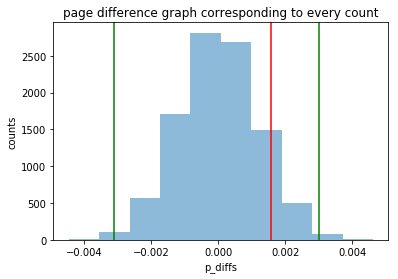

In [295]:
obs_dif = df2.query('group =="treatment"').converted.mean()- df2.query('group =="control"').converted.mean()

low_perc  = np.percentile(p_diffs, .5)
upp_perc = np.percentile(p_diffs, 99.5)
plt.hist(p_diffs, alpha=0.5)
plt.title('page difference graph corresponding to every count')#title of graphs
plt.xlabel('p_diffs') # x-label of graphs
plt.ylabel("counts")
plt.axvline(obs_diff,color="red")
plt.axvline(low_perc ,color= "green")
plt.axvline(upp_perc,color= "green")

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [296]:
print("the proportion of p_diffs greater than obs_diff = ") 
(p_diffs>obs_diff).mean()


the proportion of p_diffs greater than obs_diff = 


0.094500000000000001

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

my notes :

- in part j we computed/calculated is The p_diffs  against The actual observed difference in terms  of converted old page 
  and  new page where the null hypothesis to be true 

- what we calculated is called 'p-value' in scientific studies which equal to 0.093 

- despite The fact That p-value equal 0.093  only or 9.3 %  is low . but Thats also  means  it failed  reject the null  
  hypothesis
 




**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [297]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query('landing_page=="old_page" & converted ==1').shape[0]

# number of conversions with the new_page
convert_new = df2.query('landing_page=="new_page" & converted ==1').shape[0]

# number of individuals who were shown the old_page
n_old = df2.query('landing_page=="old_page"').shape[0]

# number of individuals who received new_page
n_new = df2.query('landing_page=="new_page"').shape[0]


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.

>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 




Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

>**Tip**: You don't have to dive deeper into z-test for this exercise. **Try having an overview of what does z-score signify in general.** 

In [298]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new], [n_old, n_new],alternative='smaller') 
print(z_score, p_value)

1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**Tip**: Notice whether the p-value is similar to the one computed earlier. Accordingly, can you reject/fail to reject the null hypothesis? It is important to correctly interpret the test statistic and p-value.

my notes :

1- the p-value shows the probability That a person failed to reject the null hypothesis 

2- The z-score describes a value's relationship to the mean of a group of values

3- while our z-score is small and our p-value is large , so hat converstions from the old page are better than the new       
 
   page or that we we can not make sure  that the converted rate of the new_page is larger than the old_page

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

my notes :

since the cases are ( a conversion or no conversion ) which they consider only two outcomes depending on page  , so its better to use logistic regression which also suitble for this kind of data "categorical data"

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [299]:

df2[['control','treatment']]= pd.get_dummies(df2['group'])
df2 = df2.drop('control',axis = 1)
df3 = df2.rename(columns={'treatment': 'ab_page'})
df3.head()


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [300]:

from scipy import stats
stats.chisqprob = lambda chisq, df3: stats.chi2.sf(chisq, df3)

df3['intercept'] = 1

rm = sm.Logit(df3['converted'],df3[['intercept','ab_page']])
results = rm.fit()



Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [301]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 19 May 2022   Pseudo R-squ.:               8.077e-06
Time:                        02:51:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


my notes :

so in regression model :

$$ H0 : pnew -pold = 0 $$
$$ H1 : pnew - pold ≠ 0 $$

but from part 2 ;

$$ H0 : pnew -pold <= 0 $$
$$ H1 : pnew - pold > 0 $$


-its clear That the p-value is less than 0.05 whic mean That its statistically significantp between the variable and the response & in case p-value is greater thn 0.05 so there no significant relationship between ab_page and conversion.

then :

1- the p-value < 0.05 means That The a variable its  significant to the response variable. nut The a bigger p-value >0.05      suggests there is no significant relation between variable and response.

2- The p-value for old_page = 0 which means its statistically significant to the response variable p-value for new_page ≈ 0.19  which is not statistically significant to the response variable 

3- as we see from part 2 These p-values differ  because in  our null hypothesis thought  that the old page is better than, or equal to the new page  which mean a one-tailed test. but in Regression its a two-tailed test  , so The  p-values have a different meaning from part 2

4- also this sugguest That there is no significant contribution from page on any landing and the diffrence in conversion rates 

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

my answer : 


it's good idea always to consider more other factors in regression model because it will allow us to identify other  influences on conversion rates and the model prediction became more accurate in general .

The disadvantges ; That the model will get more complex and its also hard to know the direction the model will be influnced by

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 
>**Hint:** Use `pandas.get_dummies()` to create dummy variables. **You will utilize two columns for the three dummy variables.** 

 Provide the statistical output as well as a written response to answer this question.

In [337]:
# Read the countries.csv

df_countries= pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [338]:
# Join with the df2 dataframe
df_last = df_countries.set_index('user_id').join(df3.set_index('user_id'), how='inner')

df_last.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [339]:
# Create the necessary dummy variables

df_last[['CA','UK', 'US']]= pd.get_dummies(df_new['country'])

df_last.head()



,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [340]:

df_last['intercept'] = 1

rm_n = sm.Logit(df_last['converted'],df_last[['intercept','ab_page','CA','US']])
results = rm_n.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 19 May 2022   Pseudo R-squ.:               2.323e-05
Time:                        03:22:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0099      0.013     -0.743      0.457      -0.036       0.016
==============================================================================
"""

my notes :


as we can see from summary That the country as a factor does not have effect or influence on the convertion rate

since the 2 dummy has a p-value > 0.05 

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

>**Tip**: Conclusions should include both statistical reasoning, and practical reasoning for the situation. 

>**Hints**: 
- Look at all of p-values in the summary, and compare against the Type I error rate (0.05). 
- Can you reject/fail to reject the null hypotheses (regression model)?
- Comment on the effect of page and country to predict the conversion.


In [341]:
# Fit your model, and summarize the results
df_last.groupby(['country','ab_page'], as_index=False).mean()

,country,ab_page,converted,intercept,CA,UK,US
0,CA,0,0.118783,1.0,1,0,0
1,CA,1,0.111902,1.0,1,0,0
2,UK,0,0.120022,1.0,0,1,0
3,UK,1,0.121171,1.0,0,1,0
4,US,0,0.120630,1.0,0,0,1
5,US,1,0.118466,1.0,0,0,1


In [342]:

df_last['us_new_ab_page'] = df_last.US *df_new.ab_page
df_last['ca_new_ab_page'] = df_last.CA *df_new.ab_page

df_last.head()
              


,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US,us_new_ab_page,ca_new_ab_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,0


In [346]:


df_last['intercept'] = 1

rm_final = sm.Logit(df_last['converted'],df_last[['intercept','ab_page','US','us_new_ab_page','CA','ca_new_ab_page']])
results_final = rm_final.fit()
results_final.summary()



Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 19 May 2022   Pseudo R-squ.:               3.482e-05
Time:                        03:26:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page            0.0108      0.023      0.475      0.635      -0.034       0.056
US                 0.0057      0.019      0.306      0.760      -0.031       0.043
us_new_ab_page    -0.0314      0.027     -1.181      0.238      -0.084       0.021
CA                -0.0118      0.040     -0.296      0.767      -0.090       0.066
ca_new_ab_page    -0.0783      0.057     -1.378      0.168      -0.190       0.033
==================================================================================
"""

summary results  :
    
as noted The p-value for both countries  are above 0.05
   
   
and hence the influence of lannding_page  in the all the  countries are the same 
    
    

final Conclusion :


1- no conclusive evidence proved That The new_page increases The conversion rate more Than old_page 

2- also There is  no  conclusive evidence proved That countries have strong influence on conversion rates


hence from point 1 & 2 we fail to reject the Null Hypothesis  since as thereare no factor  found affect the conversion rates .

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your notebook to make sure that it satisfies all the specifications mentioned in the rubric. You should also probably remove all of the "Hints" and "Tips" like this one so that the presentation is as polished as possible.


<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])